In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import scipy.stats as stats

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv', nrows=6500)

In [9]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [10]:
gdp_df.shape

(6500, 4)

6500 rows and 4 columns

In [11]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [12]:
gdp_df=gdp_df.drop(columns='Value Footnotes',axis =1)

In [13]:
gdp_df=gdp_df.rename(columns={'Value':'GDP_Per_Capita'})

In [14]:
continent_df=pd.read_csv('data/continents.csv')

In [15]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country'})

In [16]:
gdp_df["Country"]=gdp_df.replace({'Country': {"CÃƒÂ´te d'Ivoire":"Ivory Coast"}})

In [17]:
gdp_df["Country"]=gdp_df.replace({'Country':{"CuraÃ§ao":"Curaçao"}})

In [18]:
gdp_df["Country"]=gdp_df.replace({'Country':{"SÃ£o TomÃ© and Principe":"Sao Tome and Principe"}})

In [19]:
gdp_df["Country"]=gdp_df.replace({'Country':{"Sint Maarten (Dutch part)":"Sint Maarten"}})

In [20]:
gdp_df = pd.merge(gdp_df,continent_df, on='Country')

In [21]:
gdp_df.shape

(5197, 4)

In [22]:
continent_df.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [23]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [24]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 4 columns):
Country           5197 non-null object
Year              5197 non-null int64
GDP_Per_Capita    5197 non-null float64
Continent         5197 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 203.0+ KB


In [25]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 3.97 ms, sys: 2.31 ms, total: 6.28 ms
Wall time: 9.81 ms


Continent
Africa            4622.013203
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [26]:
gdp_df = gdp_df.astype({"Continent": 'category'})

In [27]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 2.73 ms, sys: 1.41 ms, total: 4.13 ms
Wall time: 2.94 ms


Continent
Africa            4622.013203
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [28]:
gdp_df.groupby('Continent')['Country'].count()

Continent
Africa           1372
Asia             1183
Europe           1202
North America     742
Oceania           365
South America     333
Name: Country, dtype: int64

In [29]:
y=gdp_df.groupby('Continent')['Country'].count()
x=column='Continent'

Text(0, 0.5, 'Number of Countries')

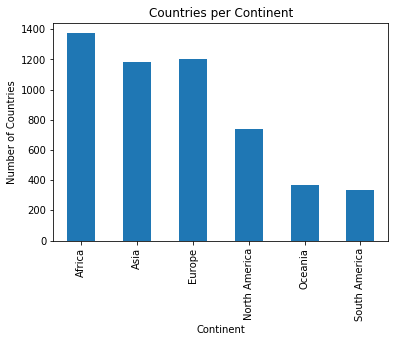

In [30]:
gdp_df.groupby('Continent')['Country'].count().plot(kind='bar',title='Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')

In [31]:
gdp_df.groupby('Continent')['Country'].count().sum()

5197

In [32]:
gdp_df.groupby('Year').count()

,Country,GDP_Per_Capita,Continent
Year,,,
1990,165,165,165
1991,166,166,166
1992,168,168,168
1993,170,170,170
1994,173,173,173
1995,179,179,179
1996,179,179,179
1997,181,181,181
1998,182,182,182


In [33]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [34]:
gdp_2014=gdp_df.loc[gdp_df['Year'] == 2014]

In [35]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,192.0,192.000000
mean,2014.0,18866.383284
std,0.0,20704.886345
min,2014.0,377.908916
25%,2014.0,4162.098972
50%,2014.0,12092.070598
75%,2014.0,26540.135519
max,2014.0,130439.187070


In [36]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Continent
2922,Mauritania,2014,377.908916,Africa
896,Central African Republic,2014,676.675821,Africa
739,Burundi,2014,768.469837,Africa
1217,Dem. Rep. Congo,2014,784.872656,Africa
3341,Niger,2014,900.136918,Africa
3134,Mozambique,2014,1117.872529,Africa
2759,Malawi,2014,1142.530804,Africa
2615,Liberia,2014,1257.625441,Africa
2731,Madagascar,2014,1372.015959,Africa
1515,Ethiopia,2014,1413.962518,Africa


In [37]:
gdp_2014=gdp_2014.assign(GDP_Group=pd.cut(gdp_2014['GDP_Per_Capita'], bins=[0,4162.17,26258.19,130439.19], include_lowest=True, labels=['low','med','high']))

In [38]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita,Continent,GDP_Group
3,Afghanistan,2014,1795.735834,Asia,low
19,Albania,2014,10700.522802,Europe,med
47,Algeria,2014,13549.025150,Africa,med
75,Angola,2014,6813.052106,Africa,med
103,Antigua and Barbuda,2014,20820.551057,North America,med


In [39]:
gdp_2014.groupby(['Continent','GDP_Group'])['GDP_Group'].count()

Continent      GDP_Group
Africa         low          33
               med          16
               high          1
Asia           low           7
               med          24
               high         13
Europe         med          21
               high         24
North America  low           2
               med          15
               high         10
Oceania        low           7
               med           5
               high          2
South America  med          12
Name: GDP_Group, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110dc6828>]],
      dtype=object)

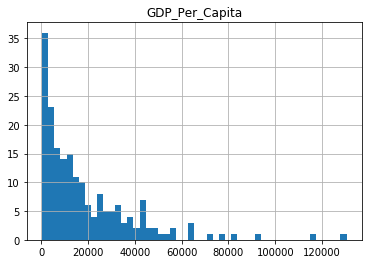

In [40]:
gdp_2014.hist(column='GDP_Per_Capita', bins=50)

The histogram is skewed right which mean the data has a boundary at zero ($0) and the majority of countries had a lower GDP. 

In [41]:
gdp_2014.skew(axis = 0)

Year              0.000000
GDP_Per_Capita    2.238514
dtype: float64

df.Skew() returns unbiased skew over requested axis Normalized by N-1. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [42]:
import seaborn as sns

Text(0, 0.5, 'GDP Per Capita')

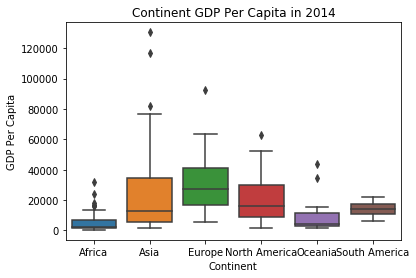

In [130]:
sns.boxplot( x=gdp_2014["Continent"], y=gdp_2014["GDP_Per_Capita"] )
plt.title('Continent GDP Per Capita in 2014')
plt.xlabel('Continent')
plt.ylabel('GDP Per Capita')

In [44]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [45]:
gdp_df_pivot=gdp_df.pivot(index='Country',columns="Year",values="GDP_Per_Capita")

In [46]:
gdp_df_pivot.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1267.644939,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636
Albania,4458.247662,3229.250516,3015.391747,3323.864796,3622.007546,4129.975847,4533.894914,4064.133302,4450.923069,5056.567135,...,9154.714872,9525.372374,9927.631333,10207.753519,10369.562385,10492.670315,10700.522802,10971.046329,11356.719009,11803.283883
Algeria,10297.842349,9927.003266,9870.942241,9451.329091,9174.299927,9342.777721,9556.806523,9507.117532,9843.132467,10015.260962,...,12707.831354,12694.745562,12920.751516,13046.369962,13226.025385,13322.569483,13549.025150,13774.299412,13939.940523,13876.294642
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6474.376423,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035
Antigua and Barbuda,17472.946483,17616.926677,17515.821953,18074.531028,18871.807320,17663.771366,18427.111846,19020.307728,19506.709858,19837.177345,...,26110.658806,22592.413330,20660.418279,19953.192771,20388.798658,20121.250141,20820.551057,21426.324931,22393.996146,22855.748017


In [47]:
gdp_df_pivot.columns

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Year')

In [48]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent'], dtype='object')

In [49]:
gdp_df_pivot=gdp_df_pivot.loc[:,[1990,2017]]

In [50]:
gdp_df_pivot=gdp_df_pivot.dropna()

In [51]:
gdp_df_pivot.head()

Year,1990,2017
Country,,
Albania,4458.247662,11803.283883
Algeria,10297.842349,13876.294642
Angola,4761.229638,6044.972035
Antigua and Barbuda,17472.946483,22855.748017
Argentina,11372.823108,18945.144022


In [52]:
gdp_pct_change=gdp_df_pivot.pct_change(axis='columns')

In [53]:
gdp_pct_change.head()

Year,1990,2017
Country,,
Albania,NaN,1.647516
Algeria,NaN,0.347495
Angola,NaN,0.269624
Antigua and Barbuda,NaN,0.308065
Argentina,NaN,0.665826


In [54]:
gdp_pct_change[2017].pct_change().fillna(0).gt(0).sum()

69

In [55]:
gdp_pct_change[2017].pct_change().fillna(0).le(0).sum()

94

In [56]:
gdp_pct_change[2017].pct_change().count()

162

In [57]:
gdp_pct_change[2017].pct_change().fillna(0).gt(0).sum()/gdp_pct_change[2017].pct_change().count()

0.42592592592592593

In [58]:
gdp_pct_change[2017].pct_change().fillna(0).le(0).sum()/gdp_pct_change[2017].pct_change().count()

0.5802469135802469

In [59]:
gdp_pct_change.idxmax()

Year
1990                  NaN
2017    Equatorial Guinea
dtype: object

In [60]:
gdp_df_yrs_pivot=gdp_df.pivot(index='Country',columns="Year",values="GDP_Per_Capita")

Text(0, 0.5, 'GDP Per Capita')

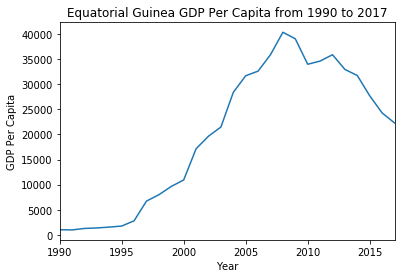

In [128]:
gdp_df_yrs_pivot.loc["Equatorial Guinea"].plot.line()
plt.title('Equatorial Guinea GDP Per Capita from 1990 to 2017')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

In [62]:
gdp_pct_change.sort_values(by=[2017])

Year,1990,2017
Country,,
Dem. Rep. Congo,NaN,-0.417598
United Arab Emirates,NaN,-0.406531
Burundi,NaN,-0.347110
Yemen,NaN,-0.298124
Ukraine,NaN,-0.244403
Central African Republic,NaN,-0.232873
Haiti,NaN,-0.217947
Tajikistan,NaN,-0.201474
Gabon,NaN,-0.174454


Text(0, 0.5, 'GDP Per Capita')

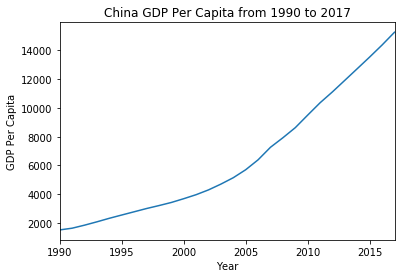

In [127]:
gdp_df_yrs_pivot.loc["China"].plot.line()
plt.title('China GDP Per Capita from 1990 to 2017')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

China has a more linear % change in GDP per capita relationship from 1990-2017. 

In [64]:
internet_df = pd.read_csv('data/internet_use.csv', nrows=4495)

In [65]:
gdp_df.shape

(5197, 4)

In [66]:
internet_df.shape

(4495, 4)

In [67]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [68]:
internet_df=internet_df.rename(columns={"Country or Area":"Country"})
internet_df=internet_df.rename(columns={"Value":"Internet_Users_Pct"})
internet_df=internet_df.drop(columns='Value Footnotes')

In [69]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [70]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [71]:
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

In [72]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent'], dtype='object')

In [73]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 4 columns):
Country           5197 non-null object
Year              5197 non-null int64
GDP_Per_Capita    5197 non-null float64
Continent         5197 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 167.7+ KB


In [74]:
internet_df.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


In [75]:
gdp_df=gdp_df.astype({'Year': 'object'})

In [76]:
internet_df=internet_df.replace({'Country':{"Macao, China":"Macao SAR, China"}})

In [77]:
internet_df=internet_df.replace({'Country':{"Brunei Darussalam":"Brunei"}})

In [78]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on=['Country','Year'], how='inner')

In [79]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]

In [80]:
gdp_and_internet_use_2014.mean()

GDP_Per_Capita        19342.761364
Internet_Users_Pct       44.846826
dtype: float64

In [81]:
gdp_and_internet_use_2014['Internet_Users_Pct'].gt(.90).sum()

167

In [82]:
top_five=gdp_2014.sort_values(by=['GDP_Per_Capita'], ascending=False).head()

In [83]:
top_five

,Country,Year,GDP_Per_Capita,Continent,GDP_Group
2703,"Macao SAR, China",2014,130439.187070,Asia,high
3751,Qatar,2014,116693.507701,Asia,high
2675,Luxembourg,2014,92349.186486,Europe,high
4054,Singapore,2014,81965.361071,Asia,high
655,Brunei,2014,76448.593329,Asia,high


In [84]:
top_5_countries=top_five['Country'].values

In [85]:
top_five=gdp_and_internet_use[gdp_and_internet_use.Country.isin(top_5_countries)]

In [86]:
top_five.Country.unique()

array(['Brunei', 'Luxembourg', 'Macao SAR, China', 'Qatar', 'Singapore'],
      dtype=object)

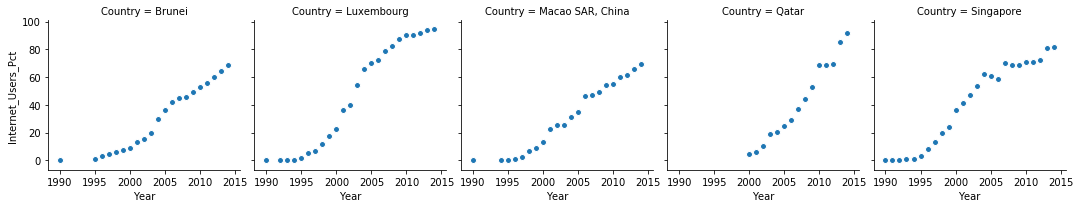

In [87]:
g=sns.FacetGrid(top_five,  col="Country")
g=g.map(plt.scatter, "Year","Internet_Users_Pct",edgecolor="w")

Text(0, 0.5, 'Internet Users Percentage')

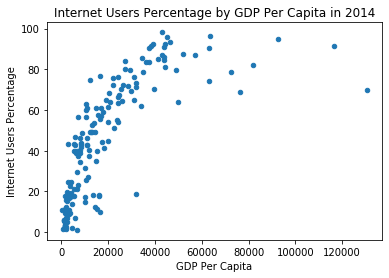

In [131]:
ax=gdp_and_internet_use_2014.plot(kind='scatter',x='GDP_Per_Capita', y='Internet_Users_Pct')
plt.title('Internet Users Percentage by GDP Per Capita in 2014')
plt.xlabel('GDP Per Capita')
plt.ylabel('Internet Users Percentage')

In [134]:
X = gdp_and_internet_use_2014['GDP_Per_Capita']
X = sm.add_constant(X)
y = gdp_and_internet_use_2014['Internet_Users_Pct']
model = sm.OLS(y, X)
ols_res = model.fit()
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sat, 14 Sep 2019   Prob (F-statistic):           3.73e-30
Time:                        13:51:52   Log-Likelihood:                -734.27
No. Observations:                 167   AIC:                             1473.
Df Residuals:                     165   BIC:                             1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.2596      2.066     12.